In [1]:
"""Topic: Pandas (Exploring and visualizing our scraped movie data in pandas)
Web scraping data from Box Office Mojo for analysis
"""

from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np

In [2]:
# Initial request for data from BoxOfficeMojo
url = 'https://www.boxofficemojo.com/chart/top_lifetime_gross_adjusted/?adjust_gross_to=2020&ref_=bo_cso_ac'

response = requests.get(url)
page = response.text

soup = BeautifulSoup(page,"lxml")

In [3]:
table = soup.find('table')
table.prettify()

&#39;&lt;table class=&quot;a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated&quot;&gt;\n &lt;tr&gt;\n  &lt;th class=&quot;a-text-right mojo-field-type-rank a-nowrap&quot;&gt;\n   &lt;span title=&quot;Rank&quot;&gt;\n    Rank\n   &lt;/span&gt;\n  &lt;/th&gt;\n  &lt;th class=&quot;a-text-left mojo-field-type-title a-nowrap&quot;&gt;\n   &lt;span title=&quot;Title&quot;&gt;\n    Title\n   &lt;/span&gt;\n  &lt;/th&gt;\n  &lt;th class=&quot;a-text-right mojo-field-type-money a-nowrap&quot;&gt;\n   &lt;span title=&quot;Adj. Lifetime Gross&quot;&gt;\n    Adj. Lifetime Gross\n   &lt;/span&gt;\n  &lt;/th&gt;\n  &lt;th class=&quot;a-text-right mojo-field-type-money a-nowrap&quot;&gt;\n   &lt;span title=&quot;Lifetime Gross&quot;&gt;\n    Lifetime Gross\n   &lt;/span&gt;\n  &lt;/th&gt;\n  &lt;th class=&quot;a-text-right mojo-field-type-positive_integer a-nowrap&quot;&gt;\n   &lt;span title=&quot;Est. Num Tickets&quot;&gt;\n    Est. Num Tickets\n   &lt;/span

In [4]:
#Breaking down all data via rows 
rows = [row for row in table.find_all('tr')]  # tr tag is for rows

In [5]:
#Display a row to see different types of tags
rows[1]

&lt;tr&gt;&lt;td class=&quot;a-text-right mojo-header-column mojo-truncate mojo-field-type-rank&quot;&gt;1&lt;/td&gt;&lt;td class=&quot;a-text-left mojo-field-type-title&quot;&gt;&lt;a class=&quot;a-link-normal&quot; href=&quot;/title/tt0031381/?ref_=bo_cso_table_1&quot;&gt;Gone with the Wind&lt;/a&gt;&lt;/td&gt;&lt;td class=&quot;a-text-right mojo-field-type-money&quot;&gt;$1,895,421,694&lt;/td&gt;&lt;td class=&quot;a-text-right mojo-field-type-money&quot;&gt;$200,852,579&lt;/td&gt;&lt;td class=&quot;a-text-right mojo-field-type-positive_integer&quot;&gt;202,286,200&lt;/td&gt;&lt;td class=&quot;a-text-left mojo-field-type-year&quot;&gt;1939&lt;/td&gt;&lt;/tr&gt;

In [30]:
for row in rows[0:1]:
    print(row.find_all('td'))
    link = items[1].find('a')
    print(link)
    print(link.text)

[]
&lt;a class=&quot;a-link-normal&quot; href=&quot;/title/tt2395427/?ref_=bo_cso_table_101&quot;&gt;Avengers: Age of Ultron&lt;/a&gt;
Avengers: Age of Ultron


In [25]:
#Calling first 100 rows of movies

movies = {}

for row in rows[1:102]:
    items = row.find_all('td')
    link = items[1].find('a')
    title, url = link.text, link['href']
    movies[title] = [url] + [i.text for i in items]

In [26]:
#Create a dataframe of movies
all_movies = pd.DataFrame(movies).T  #transpose
all_movies.columns = ['link_stub',  'ranking','title',
                    'adj_lifetime_gross', 'lifetime_gross', 'est_num_of_tickets','year']

all_movies

,link_stub,ranking,title,adj_lifetime_gross,lifetime_gross,est_num_of_tickets,year
Gone with the Wind,/title/tt0031381/?ref_=bo_cso_table_1,1,Gone with the Wind,"$1,895,421,694","$200,852,579","202,286,200",1939
Star Wars: Episode IV - A New Hope,/title/tt0076759/?ref_=bo_cso_table_2,2,Star Wars: Episode IV - A New Hope,"$1,668,979,715","$460,998,507","178,119,500",1977
The Sound of Music,/title/tt0059742/?ref_=bo_cso_table_3,3,The Sound of Music,"$1,335,086,324","$159,287,539","142,485,200",1965
E.T. the Extra-Terrestrial,/title/tt0083866/?ref_=bo_cso_table_4,4,E.T. the Extra-Terrestrial,"$1,329,174,791","$435,110,554","141,854,300",1982
Titanic,/title/tt0120338/?ref_=bo_cso_table_5,5,Titanic,"$1,270,101,626","$659,363,944","135,549,800",1997
...,...,...,...,...,...,...,...
One Flew Over the Cuckoo's Nest,/title/tt0073486/?ref_=bo_cso_table_97,97,One Flew Over the Cuckoo's Nest,"$503,032,198","$108,981,275","53,685,400",1975
MASH,/title/tt0066026/?ref_=bo_cso_table_98,98,MASH,"$503,020,954","$81,600,000","53,684,200",1970
Indiana Jones and the Temple of Doom,/title/tt0087469/?ref_=bo_cso_table_99,99,Indiana Jones and the Temple of Doom,"$501,602,336","$179,870,271","53,532,800",1984
Star Wars: Episode II - Attack of the Clones,/title/tt0121765/?ref_=bo_cso_table_100,100,Star Wars: Episode II - Attack of the Clones,"$500,999,845","$310,676,740","53,468,500",2002


In [8]:
#functions to convert money, runtime, and date from string
import dateutil.parser

def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '')
    return int(moneystring)

def runtime_to_minutes(runtimestring):
    runtime = runtimestring.split()
    try:
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return None

def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

In [9]:
def get_movie_value(soup, field_name):
    
    '''Grab a value from Box Office Mojo HTML
    
    Takes a string attribute of a movie on the page and returns the string in
    the next sibling object (the value for that attribute) or None if nothing is found.
    '''
    
    obj = soup.find(text=re.compile(field_name))
    
    if not obj: 
        return None
    
    # this works for most of the values
    next_element = obj.findNext()
    
    if next_element:
        return next_element.text 
    else:
        return None

In [10]:
def get_movie_dict(link):
    '''
    From BoxOfficeMojo link stub, request movie html, parse with BeautifulSoup, and
    collect 
        - title 
        - domestic gross
        - runtime 
        - MPAA rating
        - full release date
    Return information as a dictionary.
    '''
    
    base_url = 'https://www.boxofficemojo.com'
    
    #Create full url to scrape
    url = base_url + link
    
    #Request HTML and parse
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page,"lxml")

    
    headers = ['movie_title', 'domestic_total_gross',
               'runtime_minutes', 'rating', 'release_date', 'domestic_distributor']
    
    #Get title
    title_string = soup.find('title').text
    title = title_string.split('-')[0].strip()

    #Get domestic gross
    raw_domestic_total_gross = (soup.find(class_='mojo-performance-summary-table')
                                    .find_all('span', class_='money')[0]
                                    .text
                               )
    # raw_domestic_total_gross = (soup.find(class_='a-text-right mojo-field-type-money'))

    domestic_total_gross = money_to_int(raw_domestic_total_gross)

    #Get runtime
    raw_runtime = get_movie_value(soup,'Running')
    runtime = runtime_to_minutes(raw_runtime)
    
    #Get rating
    rating = get_movie_value(soup,'MPAA')

    #Get domestic distributor
    domestic_distributor = get_movie_value(soup,'Domestic Distributor').split('See')[0]

    #Get release date
    raw_release_date = get_movie_value(soup,'Release Date').split('\n')[0]
    release_date = to_date(raw_release_date)
    
    #Create movie dictionary and return
    movie_dict = dict(zip(headers, [title,
                                domestic_total_gross,
                                runtime,
                                rating, 
                                release_date, 
                                domestic_distributor]))

    return movie_dict

In [11]:
#creates list of all movies with features
all_movies_page_info_list = []

for link in all_movies.link_stub:
    all_movies_page_info_list.append(get_movie_dict(link))

In [12]:
all_movies_page_info_list

[{&#39;movie_title&#39;: &#39;Gone with the Wind&#39;,
  &#39;domestic_total_gross&#39;: 200852579,
  &#39;runtime_minutes&#39;: 238,
  &#39;rating&#39;: None,
  &#39;release_date&#39;: datetime.datetime(1939, 12, 15, 0, 0),
  &#39;domestic_distributor&#39;: &#39;Metro-Goldwyn-Mayer (MGM)&#39;},
 {&#39;movie_title&#39;: &#39;Star Wars: Episode IV&#39;,
  &#39;domestic_total_gross&#39;: 460998507,
  &#39;runtime_minutes&#39;: 121,
  &#39;rating&#39;: &#39;PG&#39;,
  &#39;release_date&#39;: datetime.datetime(1977, 5, 25, 0, 0),
  &#39;domestic_distributor&#39;: &#39;Twentieth Century Fox&#39;},
 {&#39;movie_title&#39;: &#39;The Sound of Music&#39;,
  &#39;domestic_total_gross&#39;: 159287539,
  &#39;runtime_minutes&#39;: 172,
  &#39;rating&#39;: None,
  &#39;release_date&#39;: datetime.datetime(1965, 3, 2, 0, 0),
  &#39;domestic_distributor&#39;: &#39;Twentieth Century Fox&#39;},
 {&#39;movie_title&#39;: &#39;E.T. the Extra&#39;,
  &#39;domestic_total_gross&#39;: 435110554,
  &#39;runtim

In [13]:
all_movies = pd.DataFrame(all_movies_page_info_list)  #convert list of dict to df
all_movies.set_index('movie_title', inplace=True)

all_movies

,domestic_total_gross,runtime_minutes,rating,release_date,domestic_distributor
movie_title,,,,,
Gone with the Wind,200852579,238.0,None,1939-12-15,Metro-Goldwyn-Mayer (MGM)
Star Wars: Episode IV,460998507,121.0,PG,1977-05-25,Twentieth Century Fox
The Sound of Music,159287539,172.0,None,1965-03-02,Twentieth Century Fox
E.T. the Extra,435110554,115.0,PG,1982-06-11,Universal Pictures
Titanic,659363944,194.0,PG-13,1997-12-18,Paramount Pictures
...,...,...,...,...,...
One Flew Over the Cuckoo's Nest,108981275,133.0,None,1975-11-20,United Artists
MASH,81600000,116.0,R,1970-01-25,Twentieth Century Fox
Indiana Jones and the Temple of Doom,179870271,118.0,None,1984-05-23,Paramount Pictures


In [14]:
#Challenge 1: Domestic total gross over time plot

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

&lt;matplotlib.collections.PathCollection at 0x13fd1b8e0&gt;

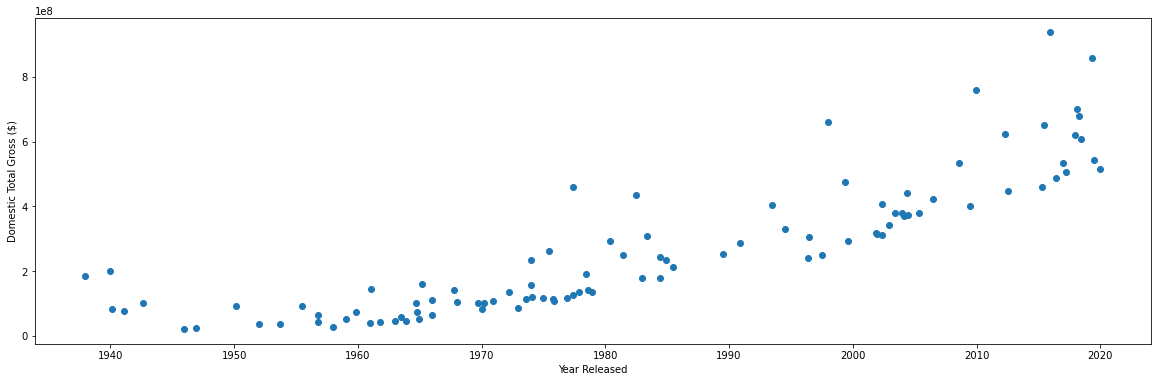

In [15]:
plt.figure(figsize = [20,6])
plt.xlabel('Year Released')
plt.ylabel('Domestic Total Gross ($)')
plt.scatter(all_movies['release_date'], all_movies['domestic_total_gross'])

&lt;matplotlib.collections.PathCollection at 0x1408010a0&gt;

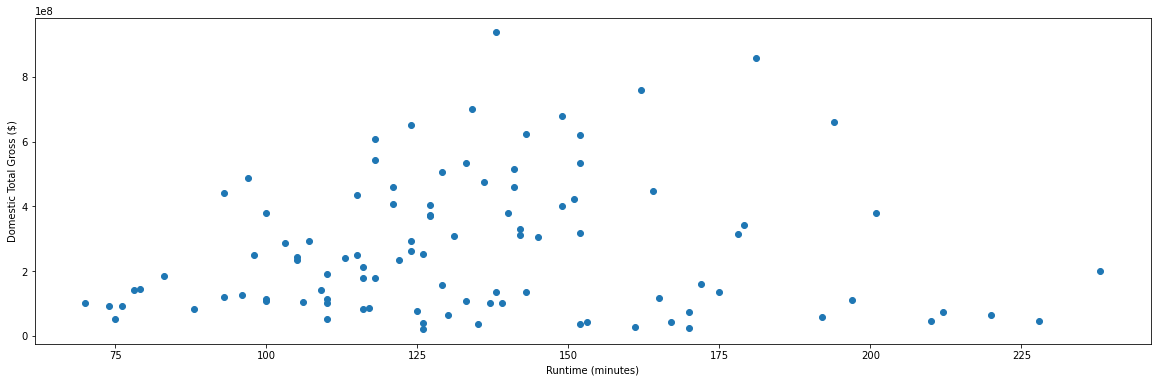

In [16]:
# Challenge 2: Runtime vs. domestic total gross plot
plt.figure(figsize = [20,6])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Domestic Total Gross ($)')
plt.scatter(all_movies['runtime_minutes'], all_movies['domestic_total_gross'])

In [17]:
#Challenge 3: Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.
rating = all_movies.groupby('rating').runtime_minutes.mean()
rating

rating
Approved     83.000000
G           108.800000
PG          121.952381
PG-13       148.928571
R           121.666667
Name: runtime_minutes, dtype: float64

In [18]:
total_gross = all_movies.groupby('rating').domestic_total_gross.mean()
total_gross

rating
Approved    1.849255e+08
G           8.396556e+07
PG          2.958813e+08
PG-13       4.892402e+08
R           2.284297e+08
Name: domestic_total_gross, dtype: float64

In [19]:
#Challenge 4: Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

set(all_movies.rating.values)

{&#39;Approved&#39;, &#39;G&#39;, None, &#39;PG&#39;, &#39;PG-13&#39;, &#39;R&#39;}

&lt;matplotlib.collections.PathCollection at 0x140b134c0&gt;

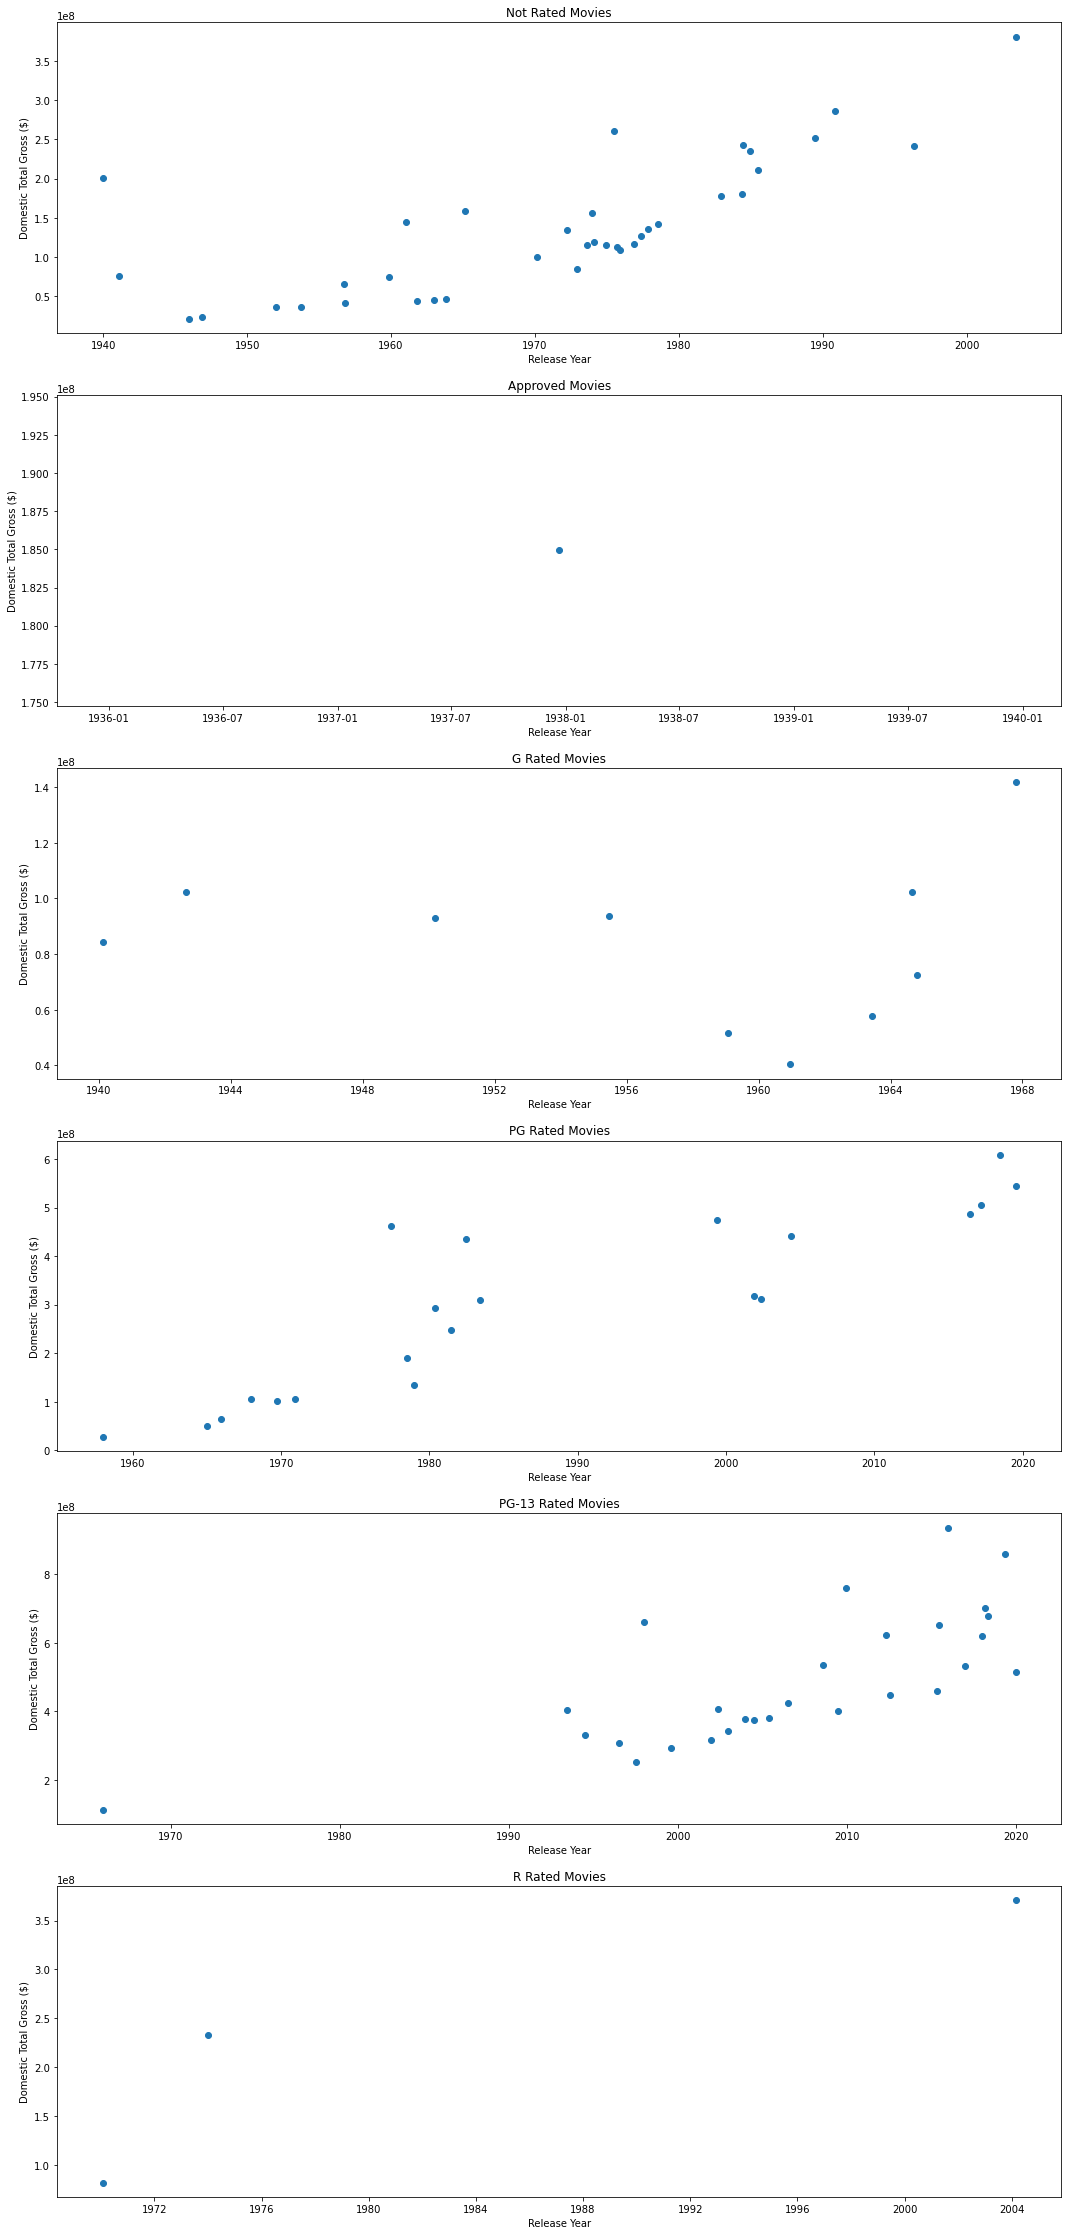

In [20]:
# df for None rated movies
mask_none_ratings = (all_movies['rating'].isnull())
all_none_ratings = all_movies[mask_none_ratings]

# df for Approved rated movies
mask_approved_ratings = (all_movies['rating'] == 'Approved')
all_approved_ratings = all_movies[mask_approved_ratings]

# df for G rated movies
mask_g_ratings = (all_movies['rating'] == 'G')
all_g_ratings = all_movies[mask_g_ratings]

# df for PG rated movies
mask_pg_ratings = (all_movies['rating'] == 'PG')
all_pg_ratings = all_movies[mask_pg_ratings]

# df for PG13 rated movies
mask_pg13_ratings = (all_movies['rating'] == 'PG-13')
all_pg13_ratings = all_movies[mask_pg13_ratings]

# df for R rated movies
mask_r_ratings = (all_movies['rating'] == 'R')
all_r_ratings = all_movies[mask_r_ratings]

plt.figure(figsize=[18,40])

#subplot for movies not rated
plt.subplot(6, 1, 1)
plt.xlabel('Release Year')
plt.ylabel('Domestic Total Gross ($)')
plt.title('Not Rated Movies')
plt.scatter(all_none_ratings['release_date'], all_none_ratings['domestic_total_gross'])
#subplot for Approved movies

plt.subplot(6, 1, 2)
plt.xlabel('Release Year')
plt.ylabel('Domestic Total Gross ($)')
plt.title('Approved Movies')
plt.scatter(all_approved_ratings['release_date'], all_approved_ratings['domestic_total_gross'])

#subplot for G rated movies
plt.subplot(6, 1, 3)
plt.xlabel('Release Year')
plt.ylabel('Domestic Total Gross ($)')
plt.title('G Rated Movies')
plt.scatter(all_g_ratings['release_date'], all_g_ratings['domestic_total_gross'])

# plot for PG rated movies
plt.subplot(6, 1, 4)
plt.xlabel('Release Year')
plt.ylabel('Domestic Total Gross ($)')
plt.title('PG Rated Movies')
plt.scatter(all_pg_ratings['release_date'], all_pg_ratings['domestic_total_gross'])

#plot for PG13 rated movies
plt.subplot(6, 1, 5)
plt.xlabel('Release Year')
plt.ylabel('Domestic Total Gross ($)')
plt.title('PG-13 Rated Movies')
plt.scatter(all_pg13_ratings['release_date'], all_pg13_ratings['domestic_total_gross'])

#plot for R rated movies
plt.subplot(6, 1, 6)
plt.xlabel('Release Year')
plt.ylabel('Domestic Total Gross ($)')
plt.title('R Rated Movies')
plt.scatter(all_r_ratings['release_date'], all_r_ratings['domestic_total_gross'])

In [21]:
#Challenge 5: Domestic distributor dataset has the highest gross per movie?
all_movies.head()

,domestic_total_gross,runtime_minutes,rating,release_date,domestic_distributor
movie_title,,,,,
Gone with the Wind,200852579,238.0,None,1939-12-15,Metro-Goldwyn-Mayer (MGM)
Star Wars: Episode IV,460998507,121.0,PG,1977-05-25,Twentieth Century Fox
The Sound of Music,159287539,172.0,None,1965-03-02,Twentieth Century Fox
E.T. the Extra,435110554,115.0,PG,1982-06-11,Universal Pictures
Titanic,659363944,194.0,PG-13,1997-12-18,Paramount Pictures


In [22]:
all_movies.groupby('domestic_distributor').mean().sort_values('domestic_total_gross', ascending=False)

,domestic_total_gross,runtime_minutes
domestic_distributor,,
DreamWorks Distribution,4.412262e+08,93.000000
DreamWorks,4.021119e+08,149.000000
Walt Disney Studios Motion Pictures,3.914672e+08,118.269231
Newmarket Films,3.707829e+08,127.000000
New Line Cinema,3.453140e+08,186.000000
Sony Pictures Entertainment (SPE),3.437664e+08,115.333333
Warner Bros.,2.615612e+08,137.222222
Universal Pictures,2.603588e+08,118.700000
Twentieth Century Fox,2.547564e+08,135.941176


In [23]:
#Challenge 6: Bin your dataset into years and make a bar graph of the mean domestic total gross by year.  Error bars will represent the standard error of the mean. Title of graph should include: Mean Domestic Total Gross by Year 

all_movies["year"] = all_movies["release_date"].apply (lambda x : x.year)
all_movies

,domestic_total_gross,runtime_minutes,rating,release_date,domestic_distributor,year
movie_title,,,,,,
Gone with the Wind,200852579,238.0,None,1939-12-15,Metro-Goldwyn-Mayer (MGM),1939
Star Wars: Episode IV,460998507,121.0,PG,1977-05-25,Twentieth Century Fox,1977
The Sound of Music,159287539,172.0,None,1965-03-02,Twentieth Century Fox,1965
E.T. the Extra,435110554,115.0,PG,1982-06-11,Universal Pictures,1982
Titanic,659363944,194.0,PG-13,1997-12-18,Paramount Pictures,1997
...,...,...,...,...,...,...
One Flew Over the Cuckoo's Nest,108981275,133.0,None,1975-11-20,United Artists,1975
MASH,81600000,116.0,R,1970-01-25,Twentieth Century Fox,1970
Indiana Jones and the Temple of Doom,179870271,118.0,None,1984-05-23,Paramount Pictures,1984


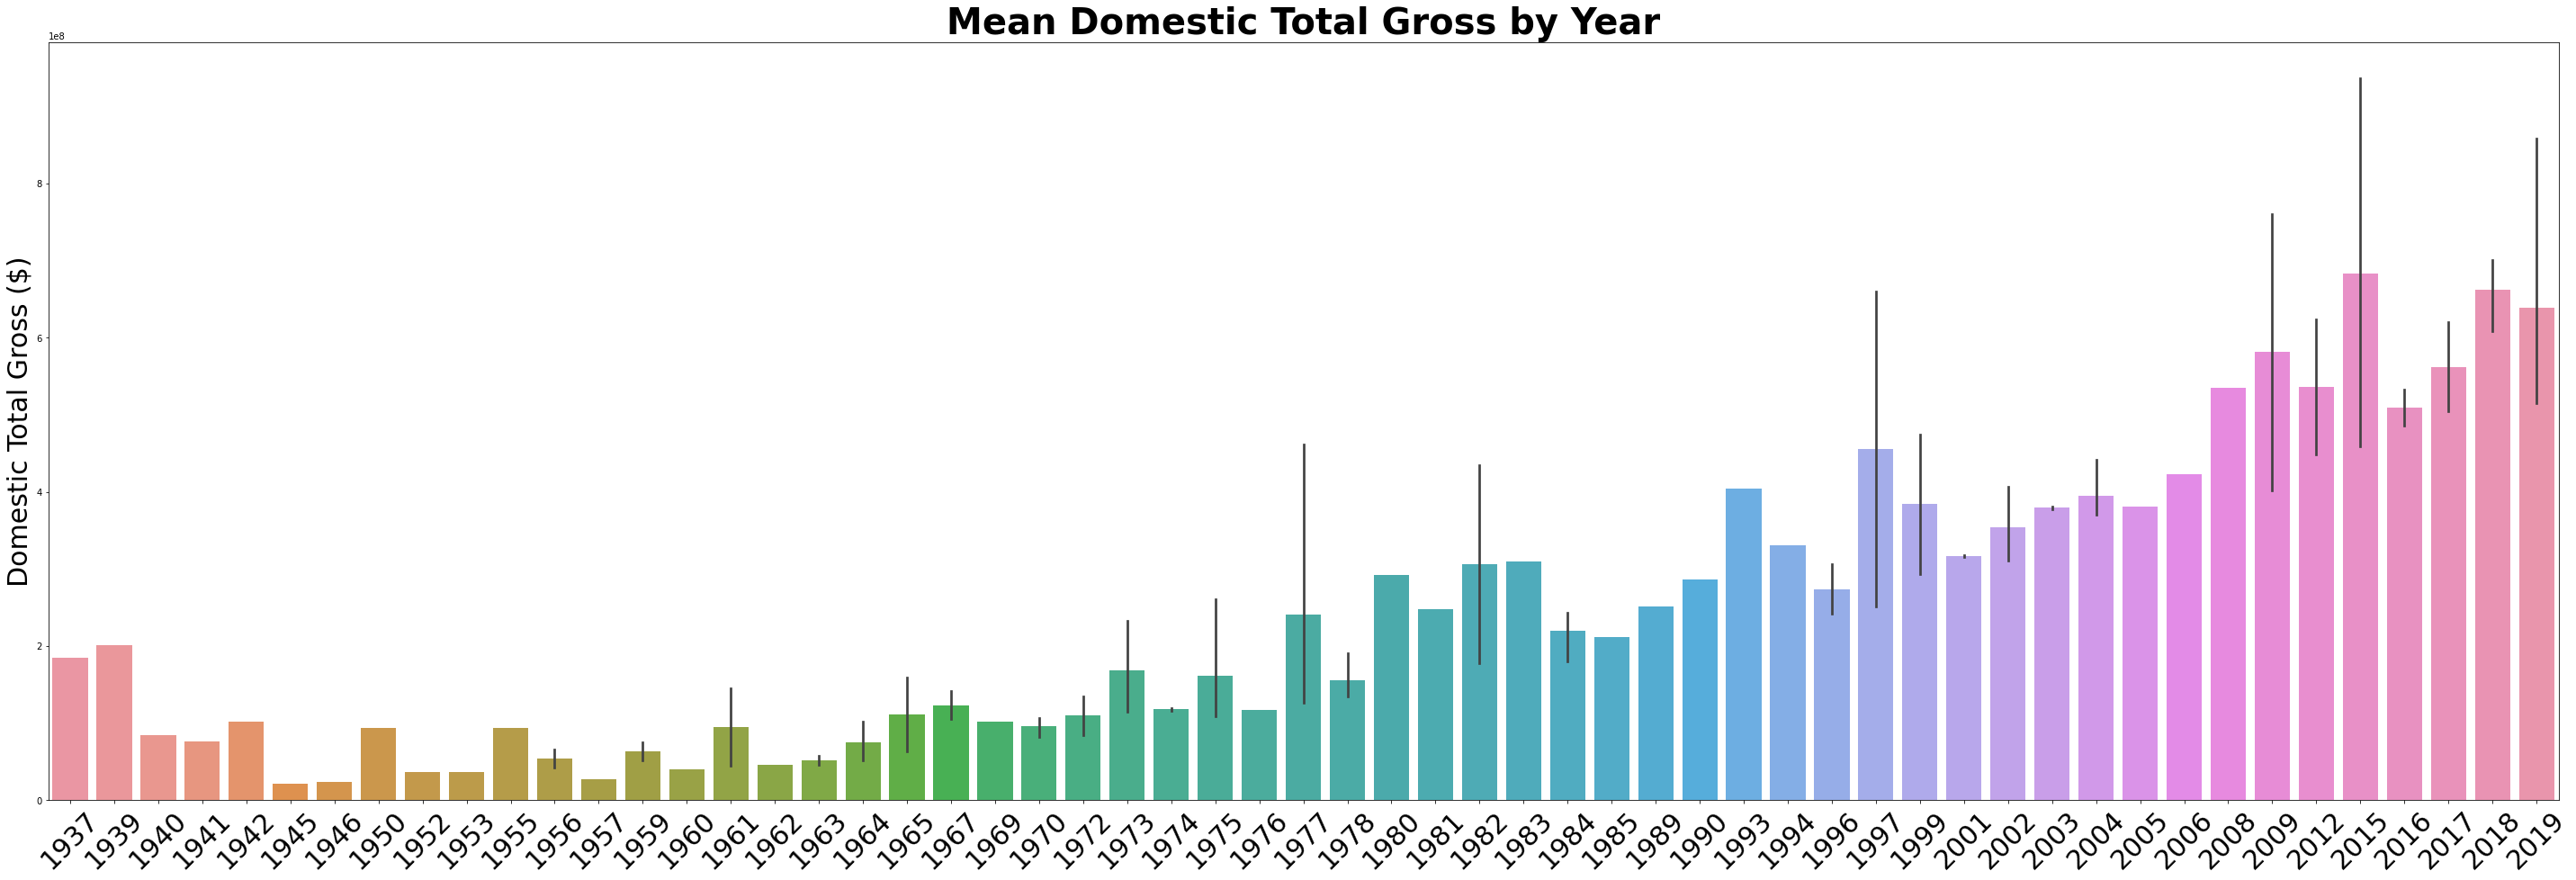

In [24]:
plt.figure(figsize=(50,15))
all_movies_year_chart = sns.barplot(x='year', y='domestic_total_gross', data=all_movies)
all_movies_year_chart.set_xticklabels(all_movies_year_chart.get_xticklabels(), rotation=45, fontsize=30)
plt.xlabel('')
plt.ylabel('Domestic Total Gross ($)', fontsize=30)
plt.title('Mean Domestic Total Gross by Year', fontsize=40, weight='bold')
plt.gcf().subplots_adjust(bottom=0.10)